<a href="https://colab.research.google.com/github/skywalker00001/Machine_Learning_Study/blob/main/21sentences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Define my dataset

In [1]:
>>> import numpy as np
>>> members = np.array([
  ['男', '25', 185, 80, '程序员', 35, 200,  30],
  ['女', '23', 170, 55, '公务员', 15,   0,  80],
  ['男', '30', 180, 82, '律师',   60, 260, 300],
  ['女', '27', 168, 52, '记者',   20, 180, 150]
])

In [2]:
security = np.float32(members[:, -1])
print(security.dtype)

float32


In [3]:
# standardization

standardization = (security - security.mean()) / security.std()
standardization

array([-1.081241  , -0.5897678 ,  1.5727142 ,  0.09829464], dtype=float32)

In [4]:
# normalization

normalization = (security - security.min()) / (security.max() - security.min())
normalization

array([0.        , 0.18518518, 1.        , 0.44444445], dtype=float32)

In [5]:
from sklearn import preprocessing as pp

X = [
  ['男', '程序员'],
  ['女', '公务员'],
  ['男', '律师', ],
  ['女', '记者', ]
]

ohe = pp.OneHotEncoder().fit(X)
ohe.transform(X).toarray() 

array([[0., 1., 0., 0., 1., 0.],
       [1., 0., 1., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 1.]])

# Import Sikit-learn dataset

In [6]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

print(X.shape)

print(y.shape)

print(X[0], y[0])

(150, 4)
(150,)
[5.1 3.5 1.4 0.2] 0


In [7]:
iris = load_iris()
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
X = iris.data
print(X.shape)
y = iris.target
print(y.shape)

(150, 4)
(150,)


# Split dataset

In [9]:
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split as tsplit

X, y = load_iris(return_X_y=True)

In [10]:
X_train, X_test, y_train, y_test = tsplit(X, y, test_size=0.1)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(135, 4) (15, 4)
(135,) (15,)


# K-neighbors classifier

In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split as tsplit

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = tsplit(X, y, test_size=0.1)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

m = KNeighborsClassifier(n_neighbors=10)
m.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [13]:
m.predict(X_test)

array([2, 2, 1, 0, 0, 1, 0, 0, 2, 2, 2, 2, 0, 0, 1])

In [14]:
y_test

array([2, 2, 1, 0, 0, 1, 0, 0, 2, 1, 2, 2, 0, 0, 1])

In [15]:
m.score(X_test, y_test)

0.9333333333333333

# K-neighbors regressor

In [16]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split as tsplit
from sklearn.neighbors import KNeighborsRegressor

X, y = load_boston(return_X_y=True)
X.shape, y.shape, y.dtype

((506, 13), (506,), dtype('float64'))

In [17]:
X_train, X_test, y_train, y_test = tsplit(X, y, test_size=0.01)
m = KNeighborsRegressor(n_neighbors=10)
m.fit(X_train, y_train)
m.predict(X_test)

array([16.92, 31.86, 36.39, 23.15, 10.63, 27.42])

In [18]:
y_test

array([15.2, 29.1, 16. , 29.9, 10.2, 50. ])

In [19]:
y_pred = m.predict(X_test)
y_pred

array([16.92, 31.86, 36.39, 23.15, 10.63, 27.42])

# Metrics

In [20]:
from sklearn import metrics
y_pred = m.predict(X_test)
MSE = metrics.mean_squared_error(y_test, y_pred)
print(MSE)
MAE = metrics.median_absolute_error(y_test, y_pred)
print(MAE)
r2 = metrics.r2_score(y_test, y_pred)
print(r2)

163.65531666666664
4.7549999999999955
0.07528339852210897


In [21]:
# decision tree

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split as tsplit
from sklearn.tree import DecisionTreeRegressor
X, y = load_boston(return_X_y=True) # 加载波士顿房价数据集

X_train, X_test, y_train, y_test = tsplit(X, y, test_size=0.01) # 拆分为训练集和测试集
m = DecisionTreeRegressor(max_depth=10) # 实例化模型，决策树深度为10
m.fit(X, y) # 训练
y_pred = m.predict(X_test) # 预测
y_pred

array([20.6       , 16.5       , 15.95      , 43.1       , 12.86666667,
       44.8       ])

In [22]:
y_test

array([20.6, 16.5, 15.2, 43.1, 12.7, 44.8])

In [23]:
MSE = metrics.mean_squared_error(y_test, y_pred)
print(MSE)
MAE = metrics.median_absolute_error(y_test, y_pred)
print(MAE)
r2 = metrics.r2_score(y_test, y_pred)
print(r2)

0.0983796296296296
0.0
0.9994416531481041


# SVM

In [24]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split as tsplit
from sklearn.svm import SVR
from sklearn import metrics

X, y = load_diabetes(return_X_y=True)
X.shape, y.shape

((442, 10), (442,))

In [25]:
X_train, X_test, y_train, y_test = tsplit(X, y, test_size=0.02)
svr_1 = SVR(kernel='rbf', C=0.1)
svr_2 = SVR(kernel='rbf', C=100)
svr_3 = SVR(kernel='rbf', C=1000)
svr_1.fit(X_train, y_train)
svr_2.fit(X_train, y_train)
svr_3.fit(X_train, y_train)
z_1 = svr_1.predict(X_test)
z_2 = svr_2.predict(X_test)
z_3 = svr_3.predict(X_test)

In [26]:
y_test

array([ 68., 111.,  63., 122.,  85., 220., 245., 225., 128.])

In [27]:
z_1

array([138.87731173, 142.49167673, 137.71488783, 143.38993794,
       140.48737443, 143.72039584, 143.19453383, 141.71801856,
       137.73516348])

In [28]:
z_2

array([123.75427214, 142.10244037,  55.27818569, 173.83502101,
       114.77843324, 201.69960102, 260.84806575, 149.58665463,
        56.12726481])

In [29]:
MSE = metrics.mean_squared_error(y_test, z_1)
print(MSE)
MAE = metrics.median_absolute_error(y_test, z_1)
print(MAE)
r2 = metrics.r2_score(y_test, z_1)
print(r2)

4260.844938175758
70.87731172723755
0.043499212934182574


In [30]:
MSE = metrics.mean_squared_error(y_test, z_2)
print(MSE)
MAE = metrics.median_absolute_error(y_test, z_2)
print(MAE)
r2 = metrics.r2_score(y_test, z_2)
print(r2)

2127.5644533020436
31.10244036534192
0.5223911915020465


In [31]:
MSE = metrics.mean_squared_error(y_test, z_3)
print(MSE)
MAE = metrics.median_absolute_error(y_test, z_3)
print(MAE)
r2 = metrics.r2_score(y_test, z_3)
print(r2)

2918.3457131579435
56.218085923814016
0.3448717303566463


# Random forest

In [32]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

ds = load_breast_cancer()
ds.data.shape

(569, 30)

In [33]:
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()

In [34]:
dtc_score = cross_val_score(dtc, ds.data, ds.target, cv=10)
dtc_score

array([0.92982456, 0.85964912, 0.92982456, 0.85964912, 0.9122807 ,
       0.89473684, 0.89473684, 0.94736842, 0.9122807 , 0.91071429])

In [35]:
dtc_score.mean()

0.9051065162907268

In [36]:
rfc_score = cross_val_score(rfc, ds.data, ds.target, cv=10)
rfc_score

array([0.98245614, 0.89473684, 0.94736842, 0.94736842, 1.        ,
       0.98245614, 0.92982456, 0.98245614, 0.94736842, 0.98214286])

In [37]:
rfc_score.mean()

0.9596177944862155

# K-Means Clustering

In [38]:
'''
!gdown --id 1fsKERl26TNTFIY25PhReoCujxwJvfyHn
!mv SimHei\ .ttf   SimHei.ttf
!mv SimHei.ttf /usr/local/lib/python3.7/dist-packages/matplotlib//mpl-data/fonts/ttf/
'''

'\n!gdown --id 1fsKERl26TNTFIY25PhReoCujxwJvfyHn\n!mv SimHei\\ .ttf   SimHei.ttf\n!mv SimHei.ttf /usr/local/lib/python3.7/dist-packages/matplotlib//mpl-data/fonts/ttf/\n'

In [39]:
'''
!cp /usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf /usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.bp

!cp /usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf /usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf
'''

'\n!cp /usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf /usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.bp\n\n!cp /usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf /usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf\n'

In [44]:
from sklearn import datasets as dss # 导入样本生成器
from sklearn.cluster import KMeans # 从聚类子模块导入聚类模型
import matplotlib.pyplot as plt

# 2means each point has 2 features -- X has 2 coordinates. y means labels
X_blob, y_blob = dss.make_blobs(n_samples=[300, 400, 300], n_features=2) 
X_circle, y_circle = dss.make_circles(n_samples=1000, noise=0.05, factor=0.5)
X_moon, y_moon = dss.make_moons(n_samples=1000, noise=0.05)

In [47]:
y_blob_pred = KMeans(n_clusters=3, init='k-means++').fit_predict(X_blob)
y_circle_pred = KMeans(n_clusters=2, init='k-means++').fit_predict(X_circle)
y_moon_pred = KMeans(n_clusters=2, init='k-means++').fit_predict(X_moon)

In [64]:
dic = {0: 'lightgreen', 1: 'cyan'}
mycolors = [dic[i] for i in y_moon_pred]

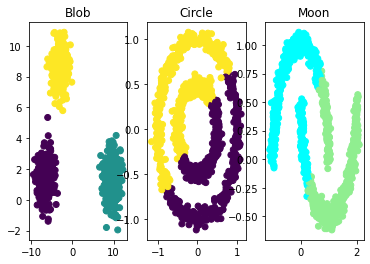

In [70]:
plt.subplot(131)
plt.title('Blob')
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob_pred)

plt.subplot(132)
plt.title('Circle')
plt.scatter(X_circle[:, 0], X_circle[:, 1], c=y_circle_pred)

plt.subplot(133)
plt.title('Moon')
plt.scatter(X_moon[:, 0], X_moon[:, 1], c=mycolors)


# DBSCAN

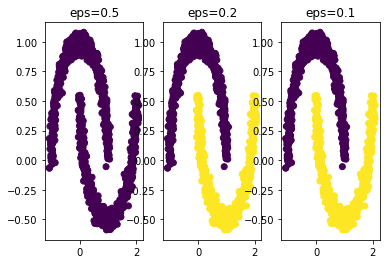

In [72]:
from sklearn import datasets as dss
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, y = dss.make_moons(n_samples=1000, noise=0.05)
dbs_1 = DBSCAN()
dbs_1.fit(X)

dbs_2 = DBSCAN(eps=0.2)
dbs_2.fit(X)

dbs_3 = DBSCAN(eps=0.1)
dbs_3.fit(X)

plt.subplot(131)
plt.title('eps=0.5')
plt.scatter(X[:, 0], X[:, 1], c=dbs_1.labels_)

plt.subplot(132)
plt.title('eps=0.2')
plt.scatter(X[:, 0], X[:, 1], c=dbs_2.labels_)

plt.subplot(133)
plt.title('eps=0.1')
plt.scatter(X[:, 0], X[:, 1], c=dbs_3.labels_)

# PCA

In [73]:
from sklearn import datasets as dds 
from sklearn.decomposition import PCA

ds = dds.load_iris()
ds.data.shape

(150, 4)

In [74]:
m = PCA()
m.fit(ds.data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [75]:
m.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [76]:
m.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [77]:
m = PCA(n_components=0.97)
m.fit(ds.data)

PCA(copy=True, iterated_power='auto', n_components=0.97, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [78]:
m.explained_variance_

array([4.22824171, 0.24267075])

In [80]:
m.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [82]:
d = m.transform(ds.data)
d.shape

(150, 2)

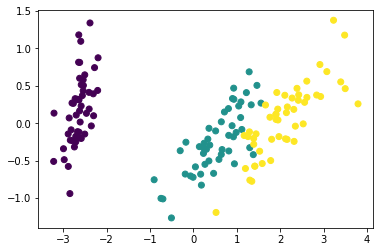

In [84]:
import matplotlib.pyplot as plt

plt.scatter(d[:, 0], d[:, 1], c=ds.target)
plt.show()